In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import panel as pn
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.figure import Figure
from matplotlib.axes import Axes
css = '''
    .bk.colorbar {
      background-color: #2896A5;
      color: #CCCCCC;
    }
    
    
    .bk.legend {
      background-color: #00ff00;
      color: #CCCCCC;
    }
    '''
pn.extension(raw_css=[css])

#### Colorbar

In [ ]:
# generating panel background

empty_fig_bg_cb = Figure() # empty figure background colorbar

background_cb = pn.pane.Matplotlib(empty_fig_bg_cb, width=1200, height=800, margin=[0,0,0,0], css_classes=['colorbar'], tight = True)

In [ ]:
background_cb

In [ ]:
# generating colorbar

vmin = 0
vmax = 100 # Vmin and vmax will be provided by the extent of the sandbox plots [0, x, 0, y, vmin, vmax]
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

In [ ]:
cb = Figure()

In [ ]:
dimensions_cb = [0, 0, 0.9*100, 1] # modify here to change the aspect of the colorbar 
#[left, bottom, width, height]
ax = Axes(cb, dimensions_cb)
cb.add_axes(ax)

In [ ]:
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='vertical')
cb1.set_label('customazable')

In [ ]:
cb

In [ ]:
# insert colorbar to panel background

background_cb.object = cb
background_cb.param.trigger('object')
background_cb

#### Legend

In [ ]:
# generating panel background

empty_fig_bg_ld = Figure() # empty figure background legend

background_ld = pn.pane.Matplotlib(empty_fig_bg_ld, width=1200, height=800, margin=[0,0,0,0], css_classes=['legend'], tight = True)

In [ ]:
background_ld

In [ ]:
# generating legend

# random plot for generating a legend
figData, ax = plt.subplots()
x = np.arange(10)
for i in range(3):
    ax.plot(x, x * (i+1), label='line %d' % i)
    
ld = Figure()

ld.legend(*ax.get_legend_handles_labels()) # with fontsize = '...' is it possible to regulate the size,
                                           # but it seems to be that the legend is regulating its size on its owm.

In [ ]:
# insert legend to legend background

background_ld.object = ld
background_ld.param.trigger("object")
background_ld

In [1]:
from sandbox.projector import Projector
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt

In [4]:
proj = Projector(show_colorbar=True, position_colorbar="horizontal")

Launching server at http://localhost:37197
Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [5]:
#proj.dim = [0, 0.5, 0.2, 1]
# [left, bottom, width, height ]
proj.replace_colorbar(vmin = 0,
                      vmax = 10, # Vmin and vmax will be provided by the extent of the sandbox plots [0, x, 0, y, vmin, vmax]
                        cmap = "viridis",
                     label = "shsh")


In [ ]:
proj.colorbar.tight = True

In [ ]:
vmin = 0 
vmax = 10 
cmap = "viridis"
label = "Custom"
norm = None
proj.dim = [0, 0, 0.1, 2]

In [ ]:
if isinstance(cmap, str):
    cmap = plt.get_cmap(cmap)
cb = Figure()
if proj.pos_colorbar == "vertical":
    dimensions_cb = proj.dim
elif proj.pos_colorbar == "horizontal":
    dimensions_cb = proj.dim

ax = Axes(cb, dimensions_cb)
cb.add_axes(ax)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax) if norm is None else norm
cb1 = matplotlib.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation=proj.pos_colorbar)
cb1.set_label(label, size=15) if label is not None else None
cb1.ax.tick_params(labelsize=15)
proj.colorbar.object = cb
proj.colorbar.param.trigger("object")

Matplotlib(Figure, css_classes=['colorbar'], dpi=100, height=50, margin=[0, 0, 0, 50], sizing_mode='fixed', tight=True, width=700)
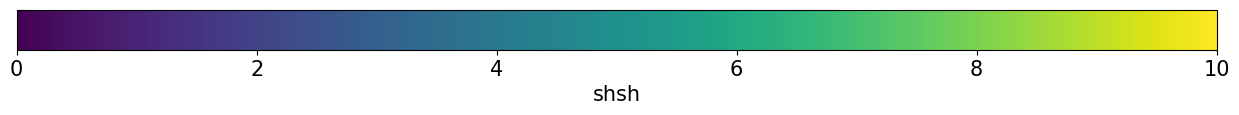

In [8]:
proj.colorbar